# Amadeus Data Science Challenge

## 0.1. Modules

In [1]:
# Import modules
# ----------------------------------------------------------------------------

# System
import os

# Performance
import time
from tqdm import tqdm

# bz2 Files
import bz2

# Data wrangling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2. Files

There are two files for the challenge. Original extension is .bz2.

- searches.csv.bz2  $\rightarrow$  bz2 size: 483 MB  $\rightarrow$  unziped size: 3.7 GB
- bookings.csv.bz2  $\rightarrow$  bz2 size: 555 MB  $\rightarrow$  unziped size: 4.2 GB

Due to the big size of both files, the approach is extracting a sample from each one to test the code on them, and after that, to execute the scripts on the complete files.

In [2]:
# where am I?
!pwd

/home/dsc/Data/amadeus_challenge


In [14]:
# what is inside this directory?
!ls -al

total 164
drwxrwxr-x 5 dsc dsc   4096 nov 22 15:46 .
drwxrwxr-x 8 dsc dsc   4096 nov 20 17:16 ..
-rw-rw-r-- 1 dsc dsc 139768 nov 22 15:46 amadeus_challenge.ipynb
drwxrwxr-x 2 dsc dsc   4096 nov 22 15:45 _data
drwxrwxr-x 8 dsc dsc   4096 nov 22 15:31 .git
drwxrwxr-x 2 dsc dsc   4096 nov 20 17:24 .ipynb_checkpoints
-rw-rw-r-- 1 dsc dsc   2694 nov 20 17:16 README.md


In [2]:
# where is the data?
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '/home/dsc/Data/challenge/bookings.csv.bz2'

In [4]:
# we extract two samples of them to see the columns and the beginning of each one
!bzcat ../challenge/searches.csv.bz2 | head -100000 > _data/searches_sample.csv
!bzcat ../challenge/bookings.csv.bz2 | head -100000 > _data/bookings_sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ../challenge/searches.csv.bz2, output file = (stdout)

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ../challenge/bookings.csv.bz2, output file = (stdout)


Once we have extract the samples (.csv format), we compressed again to .bz2 extension to work with them as if they were the complete files. The idea is trying to work in an eviroment as similar as possible to the big files one.

In [12]:
# we compress each samples to work with a similar extension file.
# -k parameter does compression but does not deletes the original file.
!bzip2 -k _data/searches_sample.csv
!bzip2 -k _data/bookings_sample.csv

In [18]:
# check which files are inside _data directory
!ls -al _data

total 66984
drwxrwxr-x 2 dsc dsc     4096 nov 22 15:45 .
drwxrwxr-x 5 dsc dsc     4096 nov 22 15:50 ..
-rw-rw-r-- 1 dsc dsc 42445466 nov 22 15:41 bookings_sample.csv
-rw-rw-r-- 1 dsc dsc  5473249 nov 22 15:41 bookings_sample.csv.bz2
-rw-rw-r-- 1 dsc dsc 18225475 nov 22 15:41 searches_sample.csv
-rw-rw-r-- 1 dsc dsc  2432065 nov 22 15:41 searches_sample.csv.bz2


After these actions there are four files:

- searches.csv.bz2  $\rightarrow$  bz2 size: 483 MB  $\rightarrow$  unziped size: 3.7 GB
- bookings.csv.bz2  $\rightarrow$  bz2 size: 555 MB  $\rightarrow$  unziped size: 4.2 GB
        
        
- searches_sample.csv.bz2  $\rightarrow$  bz2 size: 2.4 MB  $\rightarrow$  unziped size: 18.2 MB
- bookings_sample.csv.bz2  $\rightarrow$  bz2 size: 5.5 MB  $\rightarrow$  unziped size: 42.4 MB

Observing this data, it is possible to infer that:

- For the same amount of rows, bookings_sample is bigger than searches_sample so we can suppose that the amount of columns or the information contained in one row is heavier in the first file.

> bookings_row $>$ searches_row

Now that we have all the files that are needed, we can begin with the challange. To make a cleaner and readable code, we are going to assign files' paths to a set of variables.

In [2]:
# where are the complete .bz2 files?
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '/home/dsc/Data/challenge/bookings.csv.bz2'

# where are the samples .bz2 files?
path_searches_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_sample.csv.bz2'
path_bookings_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_sample.csv.bz2'

# 1. Count the number of lines in python for each file

## 1.1. Command line approach

In this part we are going to try counting the lines of each file using the command line. To optimize my laptop computational power, I am going to use the command *bzcat*, which can read a .bz2 file without uncompressing it.

In first place I am going to test this approach with the samples files, after that, I will test it with the complete files.

In [20]:
# where am i?
!pwd

/home/dsc/Data/amadeus_challenge


In [21]:
# list of all _data contents
!ls -al _data

total 66984
drwxrwxr-x 2 dsc dsc     4096 nov 22 15:45 .
drwxrwxr-x 5 dsc dsc     4096 nov 22 16:02 ..
-rw-rw-r-- 1 dsc dsc 42445466 nov 22 15:41 bookings_sample.csv
-rw-rw-r-- 1 dsc dsc  5473249 nov 22 15:41 bookings_sample.csv.bz2
-rw-rw-r-- 1 dsc dsc 18225475 nov 22 15:41 searches_sample.csv
-rw-rw-r-- 1 dsc dsc  2432065 nov 22 15:41 searches_sample.csv.bz2


In [22]:
# searches sample number of lines without unziping it
!bzcat _data/searches_sample.csv.bz2 | tqdm --bytes | wc -l

17.4MB [00:02, 6.64MB/s]
100000


As we have seen in the previous cell, the code works well for one hundred thousand rows, let's then to check it with the complete files.

In [23]:
# searches file number of lines without unziping it
!bzcat ../challenge/searches.csv.bz2 | tqdm --bytes | wc -l

3.44GB [07:56, 7.76MB/s]
20390198


In [24]:
# bookings file number of lines without unziping it
!bzcat ../challenge/bookings.csv.bz2 | tqdm --bytes | wc -l

3.95GB [07:49, 9.04MB/s]
10000011


## 1.2. Pure python approach

In the previous section we have seen how to count lines calling the command line from this notebook. As the excersise asks for to make it with python, I am going to develope another snippet of code for doing the same in a more pythonic way.

The module bz2 works similar to bzcat cmd command, it lets opening a .bz2 file without unziping it. The approach in this case is to open the file, and counting lines with `.readlines()` bz2 method.

In [22]:
# open a conection to searches sample with BZ2File class
searches_sample = bz2.BZ2File(path_searches_sample_bz2, mode='r')

# read the first line
searches_sample.readline()

b'Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice\n'

In [24]:
# close .bz2 file connection
searches_sample.close()

In the previous cell I have read the first line of a .bz2 file. To count all the lines from the sample it is possible to code a for loop with a iterable counter.

In [26]:
%%time
# for loop searches sample file
with bz2.BZ2File(path_searches_sample_bz2, mode='r') as bz2file:
    k = 0
    for line in bz2file.readlines():
        k += 1
        
print(f'Searches sample has {k} lines.')

Searches sample has 100000 files.
CPU times: user 2.01 s, sys: 103 ms, total: 2.11 s
Wall time: 2.14 s


Now that we have seen that code works correctly, we execute the same but in the complete files.

In [27]:
%%time
# for loop searches complete file
with bz2.BZ2File(path_searches_bz2, mode='r') as bz2file:
    k = 0
    for line in bz2file.readlines():
        k += 1
        
print(f'Searches complete file has {k} lines.')  

Searches complete file has 20390199 files.
CPU times: user 7min 10s, sys: 7.4 s, total: 7min 17s
Wall time: 7min 18s


In [28]:
%%time
# for loop searches complete file
with bz2.BZ2File(path_bookings_bz2, mode='r') as bz2file:
    k = 0
    for line in bz2file.readlines():
        k += 1
        
print(f'Bookings complete file has {k} lines.') 

Bookings complete file has 10000011 lines.
CPU times: user 7min 28s, sys: 12.4 s, total: 7min 40s
Wall time: 7min 41s


In [29]:
bz2file.closed

True

Now we can update the data we have about each file:

- searches.csv.bz2  $\rightarrow$  bz2 size: 483 MB  $\rightarrow$  unziped size: 3.7 GB $\rightarrow$ rows: 20,390,199
- bookings.csv.bz2  $\rightarrow$  bz2 size: 555 MB  $\rightarrow$  unziped size: 4.2 GB $\rightarrow$ rows: 10,000,011

# 2. Top 10 arrival airports in the world in 2013 (using the bookings file) 

Notes:

- Arrival airport is the column *arr_port*. It is the IATA code for the airport.

- To get the total number of passengers for an airport, you can sum the column *pax*, grouping by *arr_port*. Note that there are negative *pax* values, these correspond to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

- Print top 10 arrival airports in the standard output, including the number of passengers.


- *Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github).*

- *Bonus point: Solve this problem using pandas (instead of any other approach).*

**Strategy:**

With the sample of bookings:

- Explore columns
- Explore NaNs
- Analyze possible duplicates
- Define groupby approach

With the complete bookings file

- ¿It would be possible to replicate previous approach?
- If not, exploring another processing way

**Columns:**

In [40]:
# Open bookings_sample (pandas detects more common compressed extensions) 
bookings_sample = pd.read_csv(path_bookings_sample_bz2, sep='^')

In [41]:
bookings_sample.shape

(99999, 38)

In [42]:
# Exploring bookings columns
bookings_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

Bookings file has 38 columns, which a portion of them contain white spaces that have to been removed in order to clean column names, and avoid problems working with the data.

In [43]:
# Remove white spaces from column names
columns = list(bookings_sample.columns.values)
bookings_sample.columns = [column.strip() for column in columns]
bookings_sample.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

**NaNs:**

I defined a function to analyze the number of NaN values in each column:

In [46]:
def assess_NA(data):
    """
    returns a pandas dataframe indicating the total number of NaN values and their porcentage over the total, for each column.
    
    variables name is allocated in the dataframe's index.
    
    Parameters
    ----------
    data: dataframe
    """
    ## pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum() ## instantiate columns for missing data
    total = null_sum.sort_values(ascending = False)
    percent = (((null_sum / len(data.index)) * 100).round(2)).sort_values(ascending=False)
    
    ## concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    ## drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[(df_NA.T != 0).any()]
    
    return df_NA

df_NA = assess_NA(bookings_sample)
df_NA

,Number of NA,Percent NA


At least in this sample, there is no NaN value.

**Duplicates:**

Due to the huge number of rows, we are going to analyze if exists duplicates in the bookings sample.

In [48]:
# Drop duplicates
dd = bookings_sample.drop_duplicates()
dd.shape

(99999, 38)

At least, in this sample there is no duplicates.

**Groupby approach:**

To get the total number of passengers for an airport, you can sum the column *pax*, grouping by *arr_port*. Note that there are negative *pax* values, these correspond to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

- columns: *arr_port* and *pax*
- groupby: *arr_port*
- metrics: *pax* summatory
- order: top 10 airports by number of *pax*

In [49]:
# Group by airport, sum pax, sort an show top ten results
bookings_sample[['arr_port', 'pax']].groupby(['arr_port'])\
                                    .sum()\
                                    .sort_values('pax', ascending=False)\
                                    .reset_index()\
                                    .head(10)

,arr_port,pax
0,LHR,1006
1,MCO,861
2,JFK,795
3,LAX,761
4,BKK,747
5,LAS,732
6,SFO,705
7,ORD,686
8,CDG,676
9,DXB,587


Now that we defined the groupby approach, we are going to try executing the same code on the big file.

In [ ]:
# Open bookings complete file (pandas detects more common compressed extensions) 
bookings = pd.read_csv(path_bookings_bz2, sep='^')

# Group by airport, sum pax, sort an show top ten results
bookings_sample[['arr_port', 'pax']].groupby(['arr_port'])\
                                    .sum()\
                                    .sort_values('pax', ascending=False)\
                                    .reset_index()\
                                    .head(10)

# Never ends...

**Chunking:**

The code either fails with a `MemoryError`, or just never finishes, it seems not being scalable to big files. In order to correct this issue we are going to explore chunking.

> *chunking: refers to the process of taking individual pieces of information and grouping them into larger units. By grouping each data point into a larger whole, you can improve the amount of information you can process.*

The idea now is to divide the large dataset into smaller pieces (chunks), and then groupby each chunk; ended this process I will carry out a final groupby with all the grouped chunks.

As always, the solution will be tested first in the sample file.

In [3]:
# iterable of chunks
iter_chunks = pd.read_csv(path_bookings_sample_bz2, sep='^', chunksize=25000)
type(iter_chunks)

pandas.io.parsers.TextFileReader

In [3]:
# iterable of chunks
iter_chunks = pd.read_csv(path_bookings_sample_bz2, sep='^', chunksize=25000)

# for loop to test chunking, analyzing each chunk length
for chunk in tqdm(iter_chunks):
    print(len(chunk))

1it [00:02,  2.38s/it]

25000


2it [00:04,  2.40s/it]

25000


3it [00:07,  2.41s/it]

25000


4it [00:09,  2.38s/it]

24999


For this approach, and according to the sample duplicates study, we assume that no duplicates exist in the big file. 

In [6]:
# blank dataframe
df_total = pd.DataFrame()

# iterator of chunks
iter_chunks = pd.read_csv(
    path_bookings_bz2,
    sep='^',
    usecols=['arr_port', 'pax'],
    low_memory=False,
    chunksize=100000
)

# for loop
for k, chunk in tqdm(enumerate(iter_chunks)):
    pax = chunk[['arr_port', 'pax']].copy()
    pax['pax'] = pax['pax'].dropna()
    pax_groupby = pax[['arr_port', 'pax']].groupby(['arr_port'])\
                                          .sum()\
                                          .reset_index()
    
    df_total = df_total.append(pax_groupby, ignore_index=True)
    
    # stop control
    # if k == 3:
    #     break
    
top_10 = df_total[['arr_port', 'pax']].groupby(['arr_port'])\
                                      .sum()\
                                      .sort_values('pax', ascending=False)\
                                      .reset_index()\
                                      .head(10)

top_10

101it [10:58,  6.52s/it]


,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


Now we are going to extend the duplicates study to bookings file in all its extension. To see if is going to be duplicates or not, we can iterate n-number of times and analyze it before doing with the complete file.

In [4]:
# iterator of chunks
iter_chunks = pd.read_csv(
    path_bookings_bz2,
    sep='^',
    low_memory=False,
    chunksize=250000
)

# blank dataframe
df_total = pd.DataFrame()

# chunks loop
for k, chunk in tqdm(enumerate(iter_chunks)):
    # drop duplicates
    dd = chunk.drop_duplicates()
    # append each grouped chunk
    df_total = df_total.append(dd, ignore_index=True)
    # total drop duplicates
    bookings_wod = df_total.drop_duplicates()
    # shape
    print(len(bookings_wod))
    
    # stop control
    if k == 10:
        break

1it [00:35, 35.98s/it]

250000


2it [01:21, 38.73s/it]

500000


3it [02:15, 43.35s/it]

750000


4it [03:20, 49.82s/it]

1000000


5it [04:37, 58.17s/it]

1000000


6it [06:10, 68.52s/it]

1000000


7it [07:48, 77.30s/it]

1000000


8it [09:36, 86.43s/it]

1000000


9it [11:28, 94.35s/it]

1000000


10it [13:30, 102.69s/it]

1000000
1000000


Analyzing above results, we can infer that the complete bookings file has a lot of duplicates. For ten iterations of 250.000 each one, we have gone through 2.500.000 rows, and deleting duplicates, in the file lefts only 1.000.000 unique rows.

So let's assume that all rows from the original file are duplicated, and only exists 1.000.000 unique rows. From now on, we will work with the file without duplicates.

In [9]:
bookings_wod.to_csv(
    '/home/dsc/Data/amadeus_challenge/_data/bookings_ndup.csv.bz2',
    sep='^',
    index=False,
    compression='bz2'
)

In [3]:
# bookings file without duplicates
path_bookings_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_ndup.csv.bz2'

# blank dataframe
df_total = pd.DataFrame()

# iterator of chunks
iter_chunks = pd.read_csv(
    path_bookings_ndup_bz2,
    sep='^',
    usecols=['arr_port', 'pax'],
    low_memory=False,
    chunksize=100000
)

# for loop
for k, chunk in tqdm(enumerate(iter_chunks)):
    pax = chunk[['arr_port', 'pax']].copy()
    pax['pax'] = pax['pax'].dropna()
    pax_groupby = pax[['arr_port', 'pax']].groupby(['arr_port'])\
                                          .sum()\
                                          .reset_index()
    
    df_total = df_total.append(pax_groupby, ignore_index=True)
    
    # stop control
    # if k == 3:
    #     break
    
top_10 = df_total[['arr_port', 'pax']].groupby(['arr_port'])\
                                      .sum()\
                                      .sort_values('pax', ascending=False)\
                                      .reset_index()\
                                      .head(10)

top_10

10it [01:12,  7.38s/it]


,arr_port,pax
0,LHR,8881
1,MCO,7093
2,LAX,7053
3,LAS,6963
4,JFK,6627
5,CDG,6449
6,BKK,5946
7,MIA,5815
8,SFO,5800
9,DXB,5559


In [10]:
# where are the complete .bz2 files?
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '/home/dsc/Data/challenge/bookings.csv.bz2'

# where are the samples .bz2 files?
path_searches_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_sample.csv.bz2'
path_bookings_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_sample.csv.bz2'

# where are the .bz2 files without duplicates?
path_bookings_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_ndup.csv.bz2'

# 3. Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

Notes:

- For the arriving airport, you can use the *Destination* column in the searches file.
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- Bonus point: Solving this problem using pandas (instead of any other approach).

In [12]:
searches_sample = pd.read_csv(path_searches_sample_bz2, sep='^')

In [13]:
searches_sample.shape

(99999, 45)

**Columns:**

In [14]:
# Exploring searches columns
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

Searches file has 45 columns, in comparison with bookings file, column names do not contain whites spaces.

**NaNs:**

In [19]:
def assess_NA(data):
    """
    returns a pandas dataframe indicating the total number of NaN values and their porcentage over the total, for each column.
    
    variables name is allocated in the dataframe's index.
    
    Parameters
    ----------
    data: dataframe
    """
    ## pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum() ## instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = (((null_sum / len(data.index)) * 100).round(2)).sort_values(ascending=False)
    
    ## concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, sort=True, keys=['Number of NA', 'Percent NA'])
    
    ## drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[(df_NA.T != 0).any()]
    
    return df_NA

df_NA = assess_NA(searches_sample)
df_NA

,Number of NA,Percent NA
Country,15,0.02
From,1093,1.09
Seg1BookingCode,89222,89.22
Seg1Carrier,62158,62.16
Seg1Date,395,0.40
Seg2Arrival,27859,27.86
Seg2BookingCode,90727,90.73
Seg2Carrier,73180,73.18
Seg2Date,28322,28.32
Seg2Departure,27859,27.86


As a result of the previous analysis, it can be seen that exists 22 columns that have over a 90% of NaN values. So my conclusion in this case is remove all them.

According to the statement of the excersise, NaN values percentage in some columns, and variables needed to analyze the duplicates in the dataset, we are going to work with the next variables:

- Date
- Time
- OfficeID
- TerminalID
- Origin
- Destination

**Duplicates:**

Due to the huge number of rows of searches file, and the fact that bookings file was full of duplicates, we are going to analyze if exists duplicates in the bookings file.

To optimize the process we are only use de columns indicated in the previous point.

In [3]:
# iterator of chunks
tp = pd.read_csv(
    path_searches_bz2,
    sep='^',
    chunksize=250000,
    usecols=['Date', 'Time', 'OfficeID', 'TerminalID', 'Origin', 'Destination']
)

# blank dataframe
df_total = pd.DataFrame()

# chunks loop
for k, chunk in tqdm(enumerate(tp)):
    # drop duplicates
    key_fields = ['Date', 'Time', 'OfficeID', 'TerminalID', 'Origin', 'Destination']
    dd = chunk.drop_duplicates(subset=key_fields)
    # append each grouped chunk
    df_total = df_total.append(dd, ignore_index=True)
    # total drop duplicates
    df_total = df_total.drop_duplicates(subset=key_fields)
    print(len(df_total))
    
    # stop control
    if k == 10:
        break

1it [00:10, 10.83s/it]

249999


2it [00:22, 11.14s/it]

358999


3it [00:34, 11.47s/it]

358999


4it [00:47, 11.76s/it]

358999


5it [00:59, 11.90s/it]

358999


6it [01:12, 12.18s/it]

359003


7it [01:25, 12.31s/it]

359003


8it [01:38, 12.53s/it]

359003


9it [01:50, 12.54s/it]

359003


10it [02:03, 12.57s/it]

359003
359003


As we have seen previously with the bookings file, searches has too a lot of duplicates. From the second iteration, unique rows are almost the same.

So let's assume that all rows from the original file are duplicated, and only exists 358.977 unique rows. From now on, we will work with the file without duplicates.

In [4]:
df_total.to_csv(
    '/home/dsc/Data/amadeus_challenge/_data/searches_ndup.csv.bz2',
    sep='^',
    index=False,
    compression='bz2'
)

In [5]:
# where are the complete .bz2 files?
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '/home/dsc/Data/challenge/bookings.csv.bz2'

# where are the samples .bz2 files?
path_searches_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_sample.csv.bz2'
path_bookings_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_sample.csv.bz2'

# where are the .bz2 files without duplicates?
path_searches_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_ndup.csv.bz2'
path_bookings_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_ndup.csv.bz2'

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona:**

In [6]:
searches = pd.read_csv(
    path_searches_ndup_bz2,
    sep='^'
)

In [7]:
searches.head()

,Date,Time,OfficeID,Origin,Destination,TerminalID
0,2013-01-01,20:25:57,624d8c3ac0b3a7ca03e3c167e0f48327,TXL,AUH,d41d8cd98f00b204e9800998ecf8427e
1,2013-01-01,10:15:33,b0af35b31588dc4ab06d5cf2986e8e02,ATH,MIL,d41d8cd98f00b204e9800998ecf8427e
2,2013-01-01,18:04:49,3561a60621de06ab1badc8ca55699ef3,ICT,SFO,d41d8cd98f00b204e9800998ecf8427e
3,2013-01-01,17:42:40,1864e5e8013d9414150e91d26b6a558b,RNB,ARN,d41d8cd98f00b204e9800998ecf8427e
4,2013-01-01,17:48:29,1ec336348f44207d2e0027dc3a68c118,OSL,MAD,d41d8cd98f00b204e9800998ecf8427e


In [13]:
# date column slicing
searches['Date_ym'] = searches['Date'].str[:7] 

# filter cities
searches_groupby = searches[searches['Destination'].isin(['MAD', 'BCN', 'AGP'])].copy()

# groupby
searches_groupby = searches_groupby[['Date_ym', 'Destination']]\
                   .groupby(['Date_ym', 'Destination'])['Destination']\
                   .agg(['count'])\
                   .reset_index()

# rename count column
searches_groupby.rename(columns = {'count': 'n_flights'}, inplace=True)

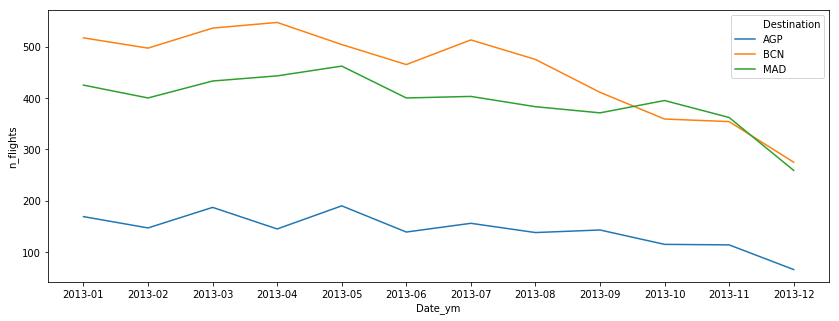

In [14]:
# Plot monthly searches for each city
fig, ax1 = plt.subplots(figsize=(14,5))
sns.lineplot(ax=ax1, data=searches_groupby, x='Date_ym', y='n_flights', hue='Destination');

# 4. Match searches with bookings

Notes:

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.
- For the bookings file, origin and destination are the columns *dep_port* and *arr_port*, respectively.
- Generate a .csv file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

The most important part of this excersise is to define a set of common keys between the two files, in order to joining the information and try to infer if a search ended as a booking.

- Searches columns: 'Date', 'Origin', 'Destination'
- Bookings columns: 'act_date', 'dep_port', 'arr_port'





In [3]:
# where are the complete .bz2 files?
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '/home/dsc/Data/challenge/bookings.csv.bz2'

# where are the samples .bz2 files?
path_searches_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_sample.csv.bz2'
path_bookings_sample_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_sample.csv.bz2'

# where are the .bz2 files without duplicates?
path_searches_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/searches_ndup.csv.bz2'
path_bookings_ndup_bz2 = '/home/dsc/Data/amadeus_challenge/_data/bookings_ndup.csv.bz2'

We read the files without duplicates:

In [104]:
# searches
searches = pd.read_csv(
    path_searches_ndup_bz2,
    sep='^'
)

#bookings
bookings = pd.read_csv(
    path_bookings_ndup_bz2,
    sep='^'
)

We show a sample of each file to analyze if it is necessary to carry out any data cleansing before the joining.

In [105]:
searches.sample(5)

,Date,Time,OfficeID,Origin,Destination,TerminalID
27104,2013-01-28,22:30:09,3561a60621de06ab1badc8ca55699ef3,AVP,DFW,d41d8cd98f00b204e9800998ecf8427e
353696,2013-12-20,01:31:26,0f3722dbc868fe983bf79895c40dec98,DEL,HYD,d41d8cd98f00b204e9800998ecf8427e
112083,2013-04-23,10:59:59,b927c9d7f26be67222348993774e029d,FRA,BEY,d41d8cd98f00b204e9800998ecf8427e
283997,2013-10-11,11:16:57,a9366b68d5cbaa9526de6308cd398363,YYC,AMS,d41d8cd98f00b204e9800998ecf8427e
241913,2013-08-30,09:04:21,86173b5000dadf6506520bd7787e16cd,MOW,SXB,d41d8cd98f00b204e9800998ecf8427e


In [106]:
searches.columns

Index(['Date', 'Time', 'OfficeID', 'Origin', 'Destination', 'TerminalID'], dtype='object')

In [107]:
bookings.sample(5)

,Unnamed: 0,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
98375,98375,2013-01-09 00:00:00,1A,HU,158e31fca9cb56ce398636ea5e828aa0,64ce75d30dd3576120f2d08ac7b62944,a7a7755fdebbf197f6cfa8e5ae1668bd,2013-01-09 00:00:00,44579,0,...,PEKTXLBUD,RF,S,Y,2013-01-23 14:00:00,2013-01-23 23:13:09,1,2013,1,NULL
443312,443312,2013-05-13 00:00:00,1A,FR,d463c7a79ef8afc366d453fc1bd7a208,8f59cbd27b4cedae91f7cc31d585888d,bd552e10ba34affe2bc041f82ac31770,2013-05-13 00:00:00,828,0,...,ORYTLS,KP,S,Y,2013-05-14 21:35:00,2013-05-14 23:03:20,1,2013,5,PARHX28AS
717736,717736,2013-04-26 00:00:00,1S,US,7e22f22aff7bd6231f3362bcfe4bc267,511e02785b75341fc3d0e6857e650426,5a42ec04c92f769f49ce98a66b176dc7,2013-04-26 00:00:00,6022,0,...,AUSIAHMIA,FK,K,Y,2013-07-10 08:37:00,2013-07-10 14:30:18,2,2013,4,NULL
678382,678382,2013-03-28 00:00:00,1S,US,2cdd51c65d45032a7bc4997d7012c5b6,1fd96278f9b47b907ff95b8af0a380c2,e634417f9ee401d2b4c17541eb025ce5,2013-03-28 00:00:00,3185,0,...,AZODTWELM,NV,V,Y,2013-04-19 08:00:00,2013-04-19 11:25:33,1,2013,3,NULL
428968,428968,2013-03-18 00:00:00,1A,FR,cfaadd5e838749aa39d9fce27e7c4861,f6590de1ba577e503a1e816781b46487,73814c3e45c77427a0dd4f36ac5c1a2d,2013-03-18 00:00:00,1633,0,...,ETZLYSPUF,KX,A,F,2013-04-03 18:00:00,2013-04-03 21:18:51,1,2013,3,EBUWL2200


In [108]:
bookings.columns

Index(['Unnamed: 0', 'act_date           ', 'source', 'pos_ctry', 'pos_iata',
       'pos_oid  ', 'rloc          ', 'cre_date           ', 'duration',
       'distance', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city',
       'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city',
       'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city',
       'mkt_ctry', 'intl', 'route          ', 'carrier', 'bkg_class',
       'cab_class', 'brd_time           ', 'off_time           ', 'pax',
       'year', 'month', 'oid      '],
      dtype='object')

In [109]:
bookings.columns = bookings.columns.str.strip()
bookings.columns

Index(['Unnamed: 0', 'act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid',
       'rloc', 'cre_date', 'duration', 'distance', 'dep_port', 'dep_city',
       'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city',
       'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city',
       'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route',
       'carrier', 'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax',
       'year', 'month', 'oid'],
      dtype='object')

In [110]:
bookings = bookings[['act_date', 'dep_port', 'arr_port']].copy()

In [111]:
bookings.sample(5)

,act_date,dep_port,arr_port
909199,2013-02-11 00:00:00,CMH,SLC
905307,2013-04-01 00:00:00,YWG,MIA
577831,2013-07-26 00:00:00,SLC,PDX
235421,2013-01-28 00:00:00,GVA,SIN
280347,2013-01-04 00:00:00,PHX,SAN


Before the join, it is necessary to modify de *act_date* format to be equal as *Date* in searches file.

In [112]:
bookings['act_date'] = bookings['act_date'].str[:10]
searches['Date'] = searches['Date'].str[:10]

In [113]:
searches.head()

,Date,Time,OfficeID,Origin,Destination,TerminalID
0,2013-01-01,20:25:57,624d8c3ac0b3a7ca03e3c167e0f48327,TXL,AUH,d41d8cd98f00b204e9800998ecf8427e
1,2013-01-01,10:15:33,b0af35b31588dc4ab06d5cf2986e8e02,ATH,MIL,d41d8cd98f00b204e9800998ecf8427e
2,2013-01-01,18:04:49,3561a60621de06ab1badc8ca55699ef3,ICT,SFO,d41d8cd98f00b204e9800998ecf8427e
3,2013-01-01,17:42:40,1864e5e8013d9414150e91d26b6a558b,RNB,ARN,d41d8cd98f00b204e9800998ecf8427e
4,2013-01-01,17:48:29,1ec336348f44207d2e0027dc3a68c118,OSL,MAD,d41d8cd98f00b204e9800998ecf8427e


In [114]:
bookings.head()

,act_date,dep_port,arr_port
0,2013-03-05,ZRH,LHR
1,2013-03-26,SAL,CLT
2,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
4,2013-03-26,AKL,SVO


Another data cleansing good practice is to strip the variables from each file.

In [115]:
# searches
for column in searches.columns:
    searches[column] = searches[column].str.strip()
    
# bookings
for column in bookings.columns:
    bookings[column] = bookings[column].str.strip()

Once we have the data cleaned, we can proceed with the join.

In [116]:
searches.head()

,Date,Time,OfficeID,Origin,Destination,TerminalID
0,2013-01-01,20:25:57,624d8c3ac0b3a7ca03e3c167e0f48327,TXL,AUH,d41d8cd98f00b204e9800998ecf8427e
1,2013-01-01,10:15:33,b0af35b31588dc4ab06d5cf2986e8e02,ATH,MIL,d41d8cd98f00b204e9800998ecf8427e
2,2013-01-01,18:04:49,3561a60621de06ab1badc8ca55699ef3,ICT,SFO,d41d8cd98f00b204e9800998ecf8427e
3,2013-01-01,17:42:40,1864e5e8013d9414150e91d26b6a558b,RNB,ARN,d41d8cd98f00b204e9800998ecf8427e
4,2013-01-01,17:48:29,1ec336348f44207d2e0027dc3a68c118,OSL,MAD,d41d8cd98f00b204e9800998ecf8427e


In [117]:
searches.shape

(359003, 6)

In [118]:
bookings['booked'] = 1
bookings.head()

,act_date,dep_port,arr_port,booked
0,2013-03-05,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
2,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
4,2013-03-26,AKL,SVO,1


In [119]:
bookings.shape

(1000000, 4)

In [120]:
conversion_rate = pd.merge(
    searches,
    bookings,
    how='left',
    left_on=['Date', 'Origin', 'Destination'],
    right_on=['act_date', 'dep_port', 'arr_port']
)

In [121]:
conversion_rate['booked'] = conversion_rate['booked'].fillna(0)
conversion_rate.shape

(386514, 10)

In [123]:
conversion_rate.sample(5)

,Date,Time,OfficeID,Origin,Destination,TerminalID,act_date,dep_port,arr_port,booked
71106,2013-03-02,12:56:57,8e26311e3f5deaceabc65406c823f84d,PMI,CGN,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,0.0
100984,2013-03-27,19:49:35,a9366b68d5cbaa9526de6308cd398363,YYZ,LAS,d41d8cd98f00b204e9800998ecf8427e,2013-03-27,YYZ,LAS,1.0
38413,2013-01-30,09:27:43,cde651a5a26c500683d124b39261f279,ALF,TOS,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,0.0
385661,2013-12-25,16:53:23,236cbf458f79dbb9d5e9c9430438c3db,SEA,LHR,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,0.0
268139,2013-09-02,18:05:17,2e8cfaa74d8a924e79cbd54d38cbbed8,WRO,FRL,d41d8cd98f00b204e9800998ecf8427e,NaN,NaN,NaN,0.0


In [125]:
conversion_rate[conversion_rate['booked']==1].shape

(45025, 10)

In [131]:
searches[(searches['Date']=='2013-03-27')&(searches['Origin']=='YYZ')&(searches['Destination']=='LAS')]

,Date,Time,OfficeID,Origin,Destination,TerminalID
85676,2013-03-27,19:49:35,a9366b68d5cbaa9526de6308cd398363,YYZ,LAS,d41d8cd98f00b204e9800998ecf8427e


In [132]:
bookings[(bookings['act_date']=='2013-03-27')&(bookings['dep_port']=='YYZ')&(bookings['arr_port']=='LAS')]

,act_date,dep_port,arr_port,booked
136150,2013-03-27,YYZ,LAS,1


In [ ]:
print(f'The conversion rate of searches into bookings is {len(searches)}%.')